In [100]:
# Import Libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

1. Basic Gray Level Transformation

i. Image Negative

In [101]:
# GrayScale Image
img = cv2.imread(r'images\meter1.jpg', 0)       # 0 = cv2.IMREAD_GRAYSCALE

In [102]:
# Method 1 : Using Logical NOT
imgNegNot = cv2.bitwise_not(img)

# Method 2 - i : Substract the img from max value (dtype)
imgNegSub = 255 - img

# Method 2 - ii
imgNegByPixels = img.copy()

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        imgNegByPixels[i, j] = 255-imgNegByPixels[i,j] 

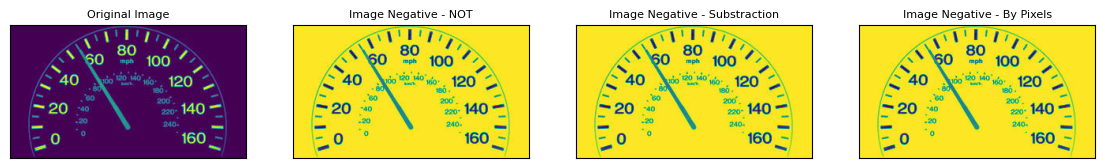

In [103]:
plt.figure(figsize=(14,10), num='test.img')

plt.subplot(1, 4, 1)
plt.xticks([]), plt.yticks([])
plt.title('Original Image', fontsize= 8)
plt.imshow(img)

plt.subplot(1, 4, 2)
plt.xticks([]), plt.yticks([])
plt.title('Image Negative - NOT', fontsize= 8)
plt.imshow(imgNegNot)

plt.subplot(1, 4, 3)
plt.xticks([]), plt.yticks([])
plt.title('Image Negative - Substraction', fontsize= 8)
plt.imshow(imgNegSub)

plt.subplot(1, 4, 4)
plt.xticks([]), plt.yticks([])
plt.title('Image Negative - By Pixels', fontsize= 8)
plt.imshow(imgNegByPixels)

ii. Image brightness

a. For Gray Level Image

In [104]:
# Import GrayScale Image
img = cv2.imread(r'images/graylevel6.jpg', cv2.IMREAD_GRAYSCALE)

In [105]:
# Method 1 - Using Addition (for grayscale images)
imgCopy = img.copy()
img1 = cv2.add(imgCopy, 100)

# Method 2 - Using a function
def increaseBrightnessGray(img, value):

    # Handle value overflow

    lim = 255 - value
    img[img > lim] = 255
    img[img <= lim] += value

    return img

# output = increaseBrightnessGray(img, value=80)
img2 = increaseBrightnessGray(img.copy(), 80)

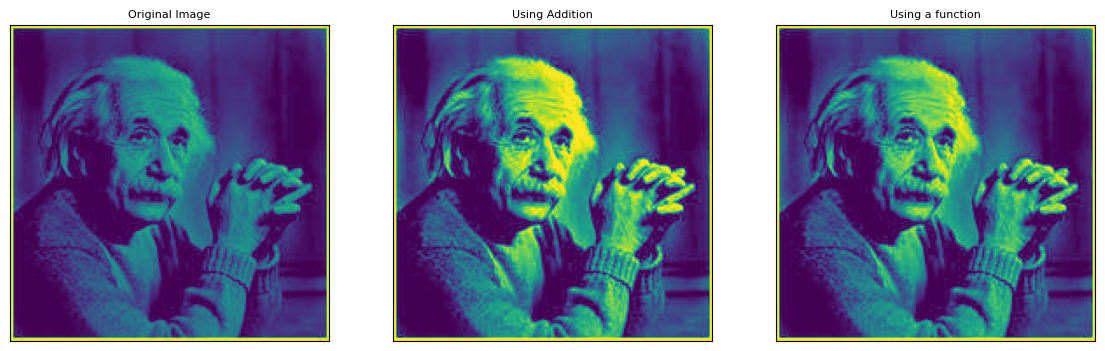

In [106]:
plt.figure(figsize=(14,10), num='test.img')

plt.subplot(1, 3, 1)
plt.xticks([]), plt.yticks([])
plt.title('Original Image', fontsize= 8)
plt.imshow(img)

plt.subplot(1, 3, 2)
plt.xticks([]), plt.yticks([])
plt.title('Using Addition', fontsize= 8)
plt.imshow(img1)

plt.subplot(1, 3, 3)
plt.xticks([]), plt.yticks([])
plt.title('Using a function', fontsize= 8)
plt.imshow(img2)

b. For Color Image

In [107]:
# Color Image
img = cv2.imread(r'images/messi5.jpg', cv2.IMREAD_COLOR)

In [108]:
# Using HSV mode V Channel

def increaseBrightnessColorImg(img, value=80):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    # Handlng value overflow
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    imgCopy = hsv.copy()

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if imgCopy[i, j, 2] + value > 255:
                imgCopy[i, j, 2] = 255
            else:
                imgCopy[i, j, 2] += value

    finalHSV = cv2.merge((h, s, v))

    return img, imgCopy

In [109]:
originalImg, output = increaseBrightnessColorImg(img, value=50)

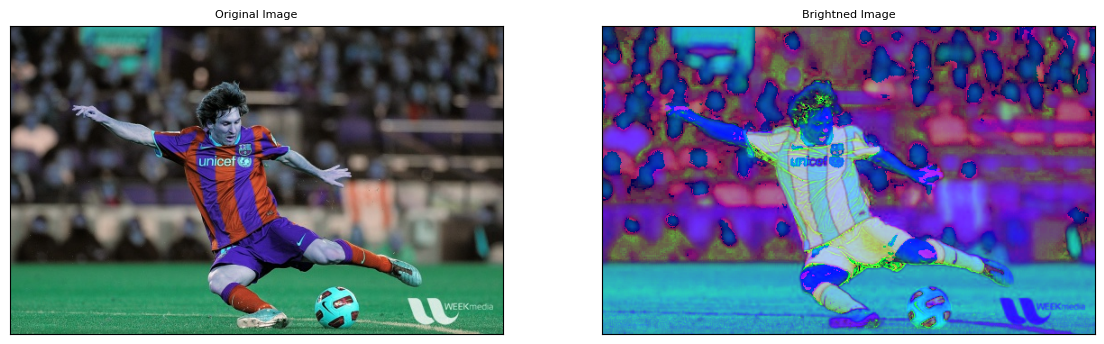

In [110]:
plt.figure(figsize=(14,10), num='test.img')

plt.subplot(1, 2, 1)
plt.xticks([]), plt.yticks([])
plt.title('Original Image', fontsize= 8)
plt.imshow(originalImg)

plt.subplot(1, 2, 2)
plt.xticks([]), plt.yticks([])
plt.title('Brightned Image', fontsize= 8)
plt.imshow(output)

iii. Log transformation

In [111]:
img = cv2.imread(r'images\meter1.jpg', cv2.IMREAD_GRAYSCALE)

In [112]:
# Apply log transformation method with scaling constant
c = 255 / np.log(1 + np.max(img))
logImg1 = c * (np.log(img + 1))

# Plain log transformation
logImg2 = np.log(img + 1)

# Converting the float values into int
logImage1 = np.array(logImg1, dtype=np.uint8)
logImage2 = np.array(logImg2, dtype=np.uint8)

C:\Users\Dilshan\AppData\Local\Temp\ipykernel_23684\3436431387.py:3: RuntimeWarning: divide by zero encountered in log
  logImg1 = c * (np.log(img + 1))
C:\Users\Dilshan\AppData\Local\Temp\ipykernel_23684\3436431387.py:6: RuntimeWarning: divide by zero encountered in log
  logImg2 = np.log(img + 1)
C:\Users\Dilshan\AppData\Local\Temp\ipykernel_23684\3436431387.py:9: RuntimeWarning: invalid value encountered in cast
  logImage1 = np.array(logImg1, dtype=np.uint8)
C:\Users\Dilshan\AppData\Local\Temp\ipykernel_23684\3436431387.py:10: RuntimeWarning: invalid value encountered in cast
  logImage2 = np.array(logImg2, dtype=np.uint8)


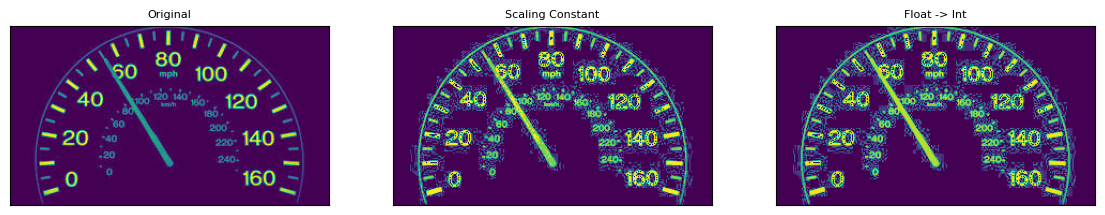

In [113]:
plt.figure(figsize=(14,10), num='test.img')

plt.subplot(1,3,1)
plt.xticks([]), plt.yticks([])
plt.title('Original', fontsize = 8)
plt.imshow(img)

plt.subplot(1,3,2)
plt.xticks([]), plt.yticks([])
plt.title('Scaling Constant', fontsize = 8)
plt.imshow(logImage2)

plt.subplot(1,3,3)
plt.xticks([]), plt.yticks([])
plt.title('Float -> Int', fontsize = 8)
plt.imshow(logImage1)

2. Piecewise Linear Transformation Functions

i. Contrast Streching/ Normalization

In [114]:
img = cv2.imread(r'images/contrast_str.png', cv2.IMREAD_GRAYSCALE)

In [115]:
inputMax = np.max(img)      # 125
inputMin = np.min(img)      # 50

outputMax = 255             # np.iinfo('uint8').max
outputMin = 0               # np.iinfo('uint8').min

outputImg = (img - inputMin) * ((outputMax - outputMin) / (inputMax - inputMin)) + outputMin
outputImg = np.array(outputImg, dtype = np.uint8)

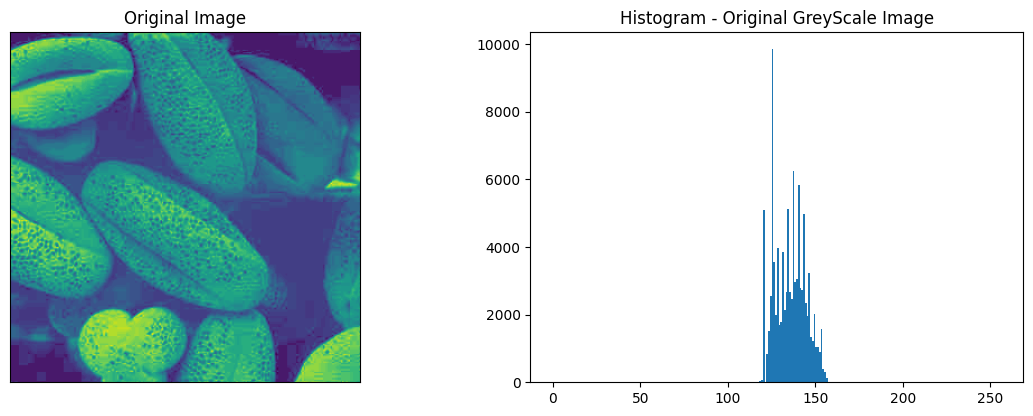

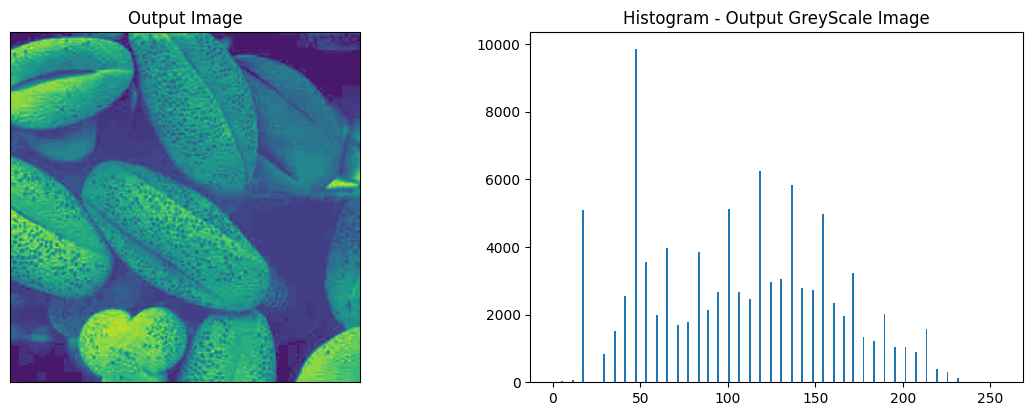

In [116]:
plt.figure(figsize=(14,10), num='test.img')

plt.subplot(2, 2, 1)
plt.xticks([]), plt.yticks([])
plt.title('Original Image')
plt.imshow(img)

plt.subplot(2, 2, 2)
plt.title('Histogram - Original GreyScale Image')
plt.hist(img.ravel(), bins=256, range=[0, 256])
plt.show()

plt.figure(figsize=(14,10), num='test.img')

plt.subplot(2, 2, 3)
plt.xticks([]), plt.yticks([])
plt.title('Output Image')
plt.imshow(outputImg)

plt.subplot(2, 2, 4)
plt.title('Histogram - Output GreyScale Image')
plt.hist(outputImg.ravel(), bins=256, range=[0, 256])
plt.show()

ii. Gray Level Slicing

In [117]:
# import image
img = cv2.imread(r'images/cameraman.tif', cv2.IMREAD_GRAYSCALE)

In [118]:
# The lower Threshold Value 
lowerT = 100

# The Upper Threshold Value
upperT = 180

# Create an array of zeroes
imgNew = np.zeros((img.shape[0], img.shape[1]) , dtype='uint8')

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        # print(img[i, j])

        if (lowerT < img[i, j] and img[i, j] < upperT):
            imgNew[i ,j] = 225
        else:
            imgNew[i ,j] = 25       # img[i ,j]

x = np.arange(0, 256, 1)
x1 = np.array(x)
print('x : ', x)

y = np.zeros_like(x1)
for i in range(0, len(x1)):
    if (x1[i] < upperT and x1[i] > lowerT):
        y[i] = 225
    else:
        y[i] = 25                   # x1[i]
print('y : ', y)

x :  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 2

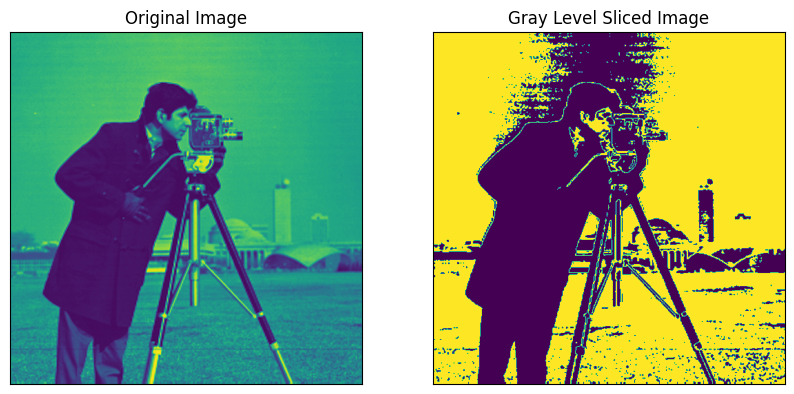

In [119]:
plt.figure(figsize=(10,10), num='test.img')

plt.subplot(1, 2, 1)
plt.xticks([]), plt.yticks([])
plt.title('Original Image')
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.xticks([]), plt.yticks([])
plt.title('Gray Level Sliced Image')
plt.imshow(imgNew)

In [120]:
y = np.zeros_like(x1)
for i in range(0, len(x1)):
    if (x1[i] < upperT and x1[i] > lowerT):
        y[i] = 225
    else:
        y[i] = x[i]                 # x1[i]
print('y : ', y)

y :  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 225 225 225 225 225 225 225
 225 225 225 225 225 225 225 225 225 225 225 225 225 225 225 225 225 225
 225 225 225 225 225 225 225 225 225 225 225 225 225 225 225 225 225 225
 225 225 225 225 225 225 225 225 225 225 225 225 225 225 225 225 225 225
 225 225 225 225 225 225 225 225 225 225 225 225 225 225 225 225 225 225
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 2

iii. Bit plane slicing

3. Thresholding/ Binarization

i. Global Thresholding / Simple Thresholding

In [121]:
# Import Image
img = cv2.imread(r'images\cameraman.tif', cv2.IMREAD_GRAYSCALE)
img_ = img.copy()

In [122]:
# Global Threshold Value
T1 = 100

# Create an array of zeroes
imgNew = np.zeros((img.shape[0], img.shape[1]) , dtype='uint8')

In [123]:
# Method 1
img_[img < T1] = 0
img_[img >= T1] = 255

In [124]:
# method 2

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        # print(img[i, j])

        if img[i,j] < T1:
            imgNew[i,j] = 0
        else:
            imgNew[i,j] = 255       # img[i ,j]

x = np.arange(0, 256, 1)
x1 = np.array(x)
print('x : ', x)

y = np.zeros_like(x1)
for i in range(0, len(x1)):
    if x1[i] > T1:
        y[i] = 255
    else:
        y[i] = 0                   # x1[i]
print('y : ', y)

x :  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 2

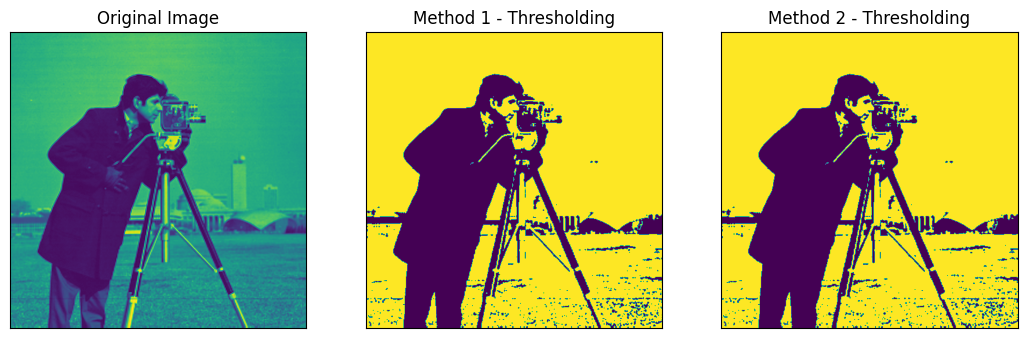

In [125]:
plt.figure(figsize=(13,13), num='test.img')

plt.subplot(1, 3, 1)
plt.xticks([]), plt.yticks([])
plt.title('Original Image')
plt.imshow(img)

plt.subplot(1, 3, 2)
plt.xticks([]), plt.yticks([])
plt.title('Method 1 - Thresholding')
plt.imshow(img_)

plt.subplot(1, 3, 3)
plt.xticks([]), plt.yticks([])
plt.title('Method 2 - Thresholding')
plt.imshow(imgNew)

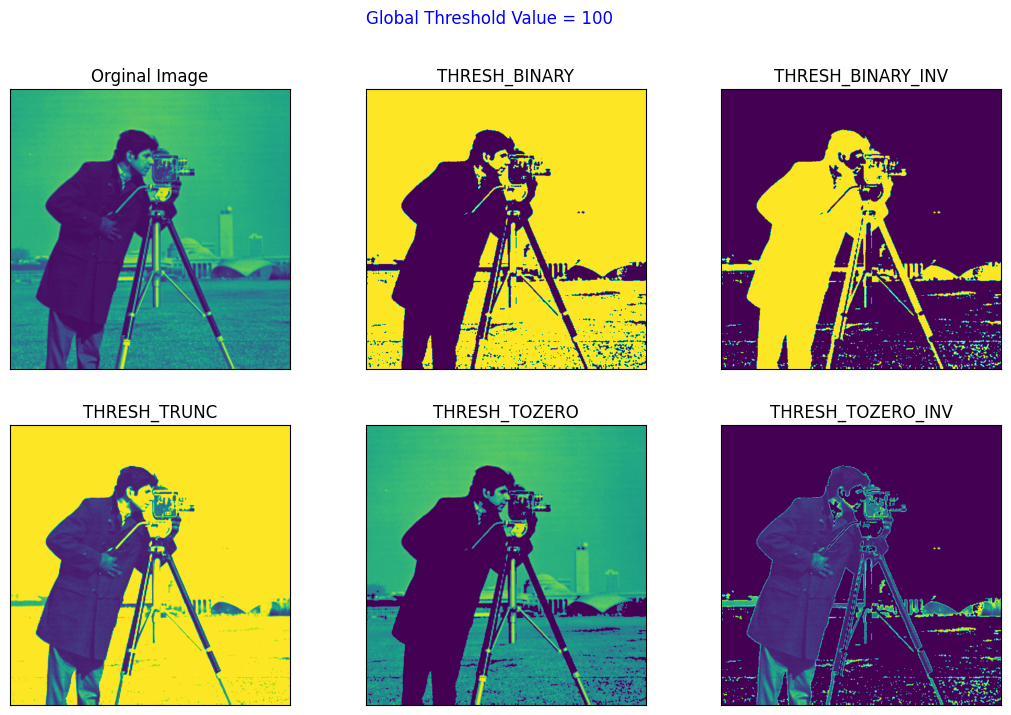

In [126]:
# Import Image
img = cv2.imread(r'images\cameraman.tif', cv2.IMREAD_GRAYSCALE)

# Global Threshold Value
T1 = 100

ret, thres1 = cv2.threshold(img, T1, 255, cv2.THRESH_BINARY)
ret, thres2 = cv2.threshold(img, T1, 255, cv2.THRESH_BINARY_INV)
ret, thres3 = cv2.threshold(img, T1, 255, cv2.THRESH_TRUNC)
ret, thres4 = cv2.threshold(img, T1, 255, cv2.THRESH_TOZERO)
ret, thres5 = cv2.threshold(img, T1, 255, cv2.THRESH_TOZERO_INV)

titles = ['Orginal Image', 'THRESH_BINARY', 'THRESH_BINARY_INV', 'THRESH_TRUNC', 'THRESH_TOZERO', 'THRESH_TOZERO_INV']
images = [img, thres1, thres2, thres3, thres4, thres5]

plt.figure(figsize=(13, 8), num='test.img')
plt.suptitle("Global Threshold Value = 100", color = "blue")

for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.xticks([]), plt.yticks([])
    plt.title(titles[i])
    plt.imshow(images[i])

ii. Adaptive Thresholding

In [127]:
img = cv2.imread(r'images\sudoku-original.jpg', cv2.IMREAD_GRAYSCALE)

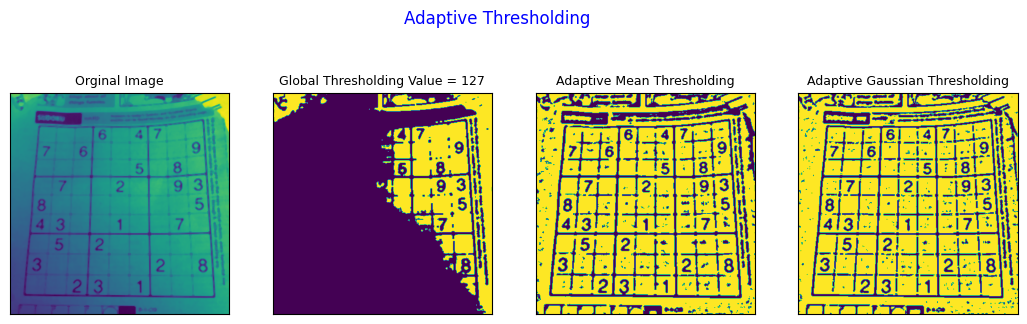

In [128]:
img = cv2.medianBlur(img, 5)

ret, thres1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
thres2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 2)
thres3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 2)

titles = ['Orginal Image', 'Global Thresholding Value = 127', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, thres1, thres2, thres3]

plt.figure(figsize=(13, 4), num='test.img')
plt.suptitle("Adaptive Thresholding", color = "blue")

for i in range(len(images)):
    plt.subplot(1, 4, i+1)
    plt.xticks([]), plt.yticks([])
    plt.title(titles[i], fontsize = 9)
    plt.imshow(images[i])

iii. Otzu's Thresholding

In [129]:
img = cv2.imread(r'images\noisy2.png', cv2.IMREAD_GRAYSCALE)

In [130]:
# Global Thresholding
ret, thres1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Otzu's Thresholding
ret, thres2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Otzu's thresholding after after Gaussian filter
blur = cv2.GaussianBlur(img, (5,5), 0)
ret, thres3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

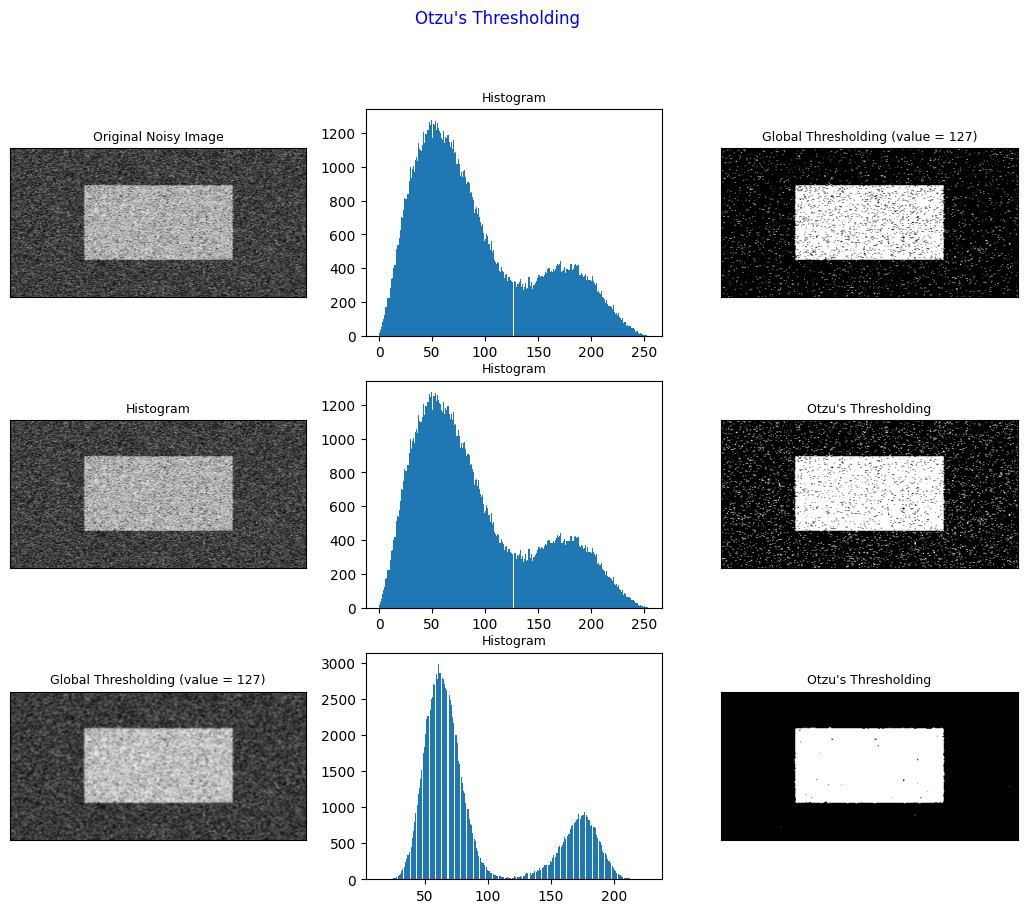

In [131]:
titles = ['Original Noisy Image', 'Histogram', 'Global Thresholding (value = 127)',
          'Original Noisy Image', 'Histogram', "Otzu's Thresholding",
          'Gaussian Filtered Image', 'Histogram', "Otzu's Thresholding"]

images = [img, 0, thres1, img, 0, thres2, blur, 0, thres3]

plt.figure(figsize=(13, 10), num='test.img')
plt.suptitle("Otzu's Thresholding", color = "blue")

for i in range(3):
    plt.subplot(3, 3, i*3+1)
    plt.xticks([]), plt.yticks([])
    plt.title(titles[i], fontsize = 9)
    plt.imshow(images[i*3], 'gray')

    plt.subplot(3, 3, i*3+2)
    # plt.xticks([]), plt.yticks([])
    plt.title(titles[i*3+1], fontsize = 9)
    plt.hist(images[i*3].ravel(), 256)

    plt.subplot(3, 3, i*3+3)
    plt.xticks([]), plt.yticks([])
    plt.title(titles[i*3+2], fontsize = 9)
    plt.imshow(images[i*3+2], 'gray')